In [233]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('netflix_titles.csv')

In [240]:
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,Movie Duration,# of TV Show Season
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,NaN,4
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,93,NaN
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,78,NaN
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,80,NaN
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,123,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,99,NaN
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,111,NaN
7784,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,44,NaN
7785,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,NaN,1


In [5]:
def investigate(df):
    
    
    print('# of data :',df.shape[0])
    print('# of features :',df.shape[1])
    print('-'*10)
    print('COLUMN NAMES: ',df.columns)
    print('-'*10)
    print('Types of each columns is: \n',df.dtypes) 
    print('-'*10)
    print('Null values for each columns is :\n',df.isnull().sum())
    print('-'*10)
  

investigate(df)   

# of data : 7787
# of features : 12
----------
COLUMN NAMES:  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
----------
Types of each columns is: 
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
----------
Null values for each columns is :
 show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
----------


In [6]:
df=df.drop('show_id',axis=1)

Text(0.5, 1.0, 'MOVIE_COUNT')

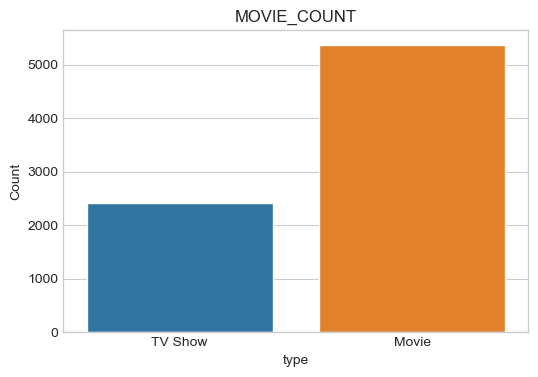

In [7]:
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(data=df,x='type')
plt.ylabel('Count')
plt.title('MOVIE_COUNT',fontsize=12)

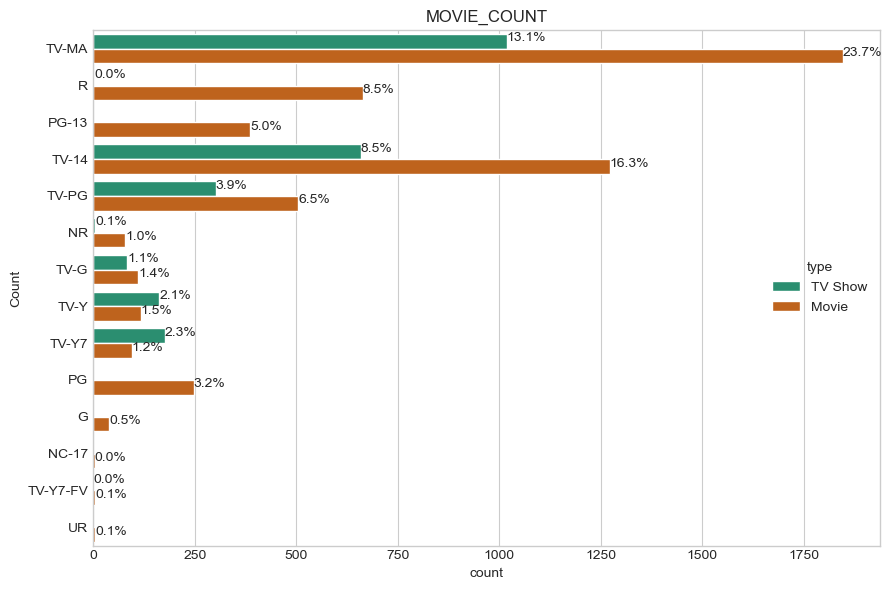

In [8]:
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
plt.figure(figsize=(9,6),dpi=100)
a = sns.countplot(data=df,y='rating',hue='type',palette='Dark2')
plt.ylabel('Count')
plt.title('MOVIE_COUNT',fontsize=12)
plt.tight_layout()

total = len(df['rating'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))

In [9]:
years= df.sort_values(by=['release_year'])[['release_year']].reset_index(drop=True)


Text(0.5, 1.0, 'YEARS_COUNT')

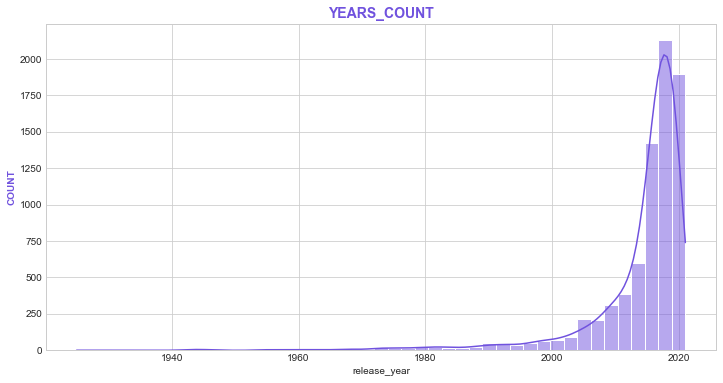

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(years['release_year'],kde=True,palette='Set2',color='#7052DE',bins=45);
plt.ylabel('COUNT',color='#7052DE',fontname="Arial",fontweight="bold")
plt.title('YEARS_COUNT',fontsize=14,color='#7052DE',fontname="Arial",fontweight="bold")
#plt.xlabel('COUNT',color='#7052DE',fontname="Arial",fontweight="bold")


In [12]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [13]:
df['date_added'].sort_values()

7113   2008-01-01
1765   2008-02-04
3248   2009-05-05
5765   2009-11-18
3840   2010-11-01
          ...    
3374          NaT
3492          NaT
3946          NaT
5137          NaT
6065          NaT
Name: date_added, Length: 7787, dtype: datetime64[ns]

In [14]:
df_pop_countries = df[df['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Mexico'])]

grouped= df_pop_countries.groupby(['country'])
final = grouped.agg({'release_year' : [np.min, np.max]})
final.columns = [('EARLIEST'),
            ('LATEST')]

final.sort_values(by=['EARLIEST'])

,EARLIEST,LATEST
country,,
United States,1942,2021
Egypt,1954,2020
India,1959,2021
France,1974,2020
United Kingdom,1974,2021
Japan,1979,2020
Mexico,1979,2021
Canada,1998,2020
South Korea,2004,2021


In [15]:
grouped = df.groupby(['type'])

<AxesSubplot:xlabel='country', ylabel='count'>

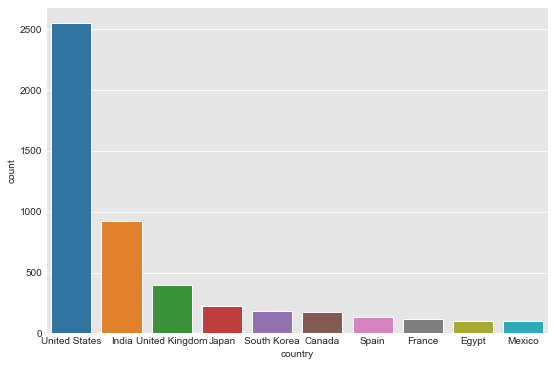

In [319]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(9,6))
countries = df['country'].value_counts()[:15]
sns.countplot(x='country',data=df,order=pd.value_counts(df['country']).iloc[:10].index)

### Check out

In [17]:
### TRY TO PLOT THIS GROUPED TABLE WITH HISTOGRAM !!

grouped_count = df_pop_countries.groupby(['country','type']).agg(['count'])[['cast']]
grouped_count.columns = ['COUNT']
grouped_count

COUNT
country        type          
Canada         Movie      106
               TV Show     53
Egypt          Movie       88
               TV Show     12
France         Movie       63
               TV Show     36
India          Movie      837
               TV Show     57
Japan          Movie       67
               TV Show    155
Mexico         Movie       59
               TV Show     33
South Korea    Movie       35
               TV Show    145
Spain          Movie       77
               TV Show     40
United Kingdom Movie      163
               TV Show    169
United States  Movie     1670
               TV Show    581

In [18]:
df["year"] = df['date_added'].map(lambda x: x.year)
df['year']= df['year'].values.astype(int)
df

df["month"] = df['date_added'].map(lambda x: x.month)
df['month']= df['month'].values.astype(int)
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12


In [19]:
df_pop_2 = df[df['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Mexico'])]

grouped_2 = df_pop_2.groupby(['country','year']).agg(['count'])['director']
grouped_2

count
country       year       
Canada        2013      1
              2014      0
              2015      2
              2016      5
              2017     28
...                   ...
United States 2017    292
              2018    335
              2019    545
              2020    444
              2021     39

[74 rows x 1 columns]

In [255]:
df_pop_2 = df[df['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Egypt', 'Mexico'])]

df_us= df[df['country'].isin(['United States'])]
df_ın= df[df['country'].isin(['India'])]
df_uk= df[df['country'].isin(['United Kingdom'])]
df_jap= df[df['country'].isin(['Japan'])]
df_can= df[df['country'].isin(['Canada'])]
df_mex= df[df['country'].isin(['Mexico'])]
df_fra= df[df['country'].isin(['France'])]

Text(0.5, 1.0, 'UNITED STATES')

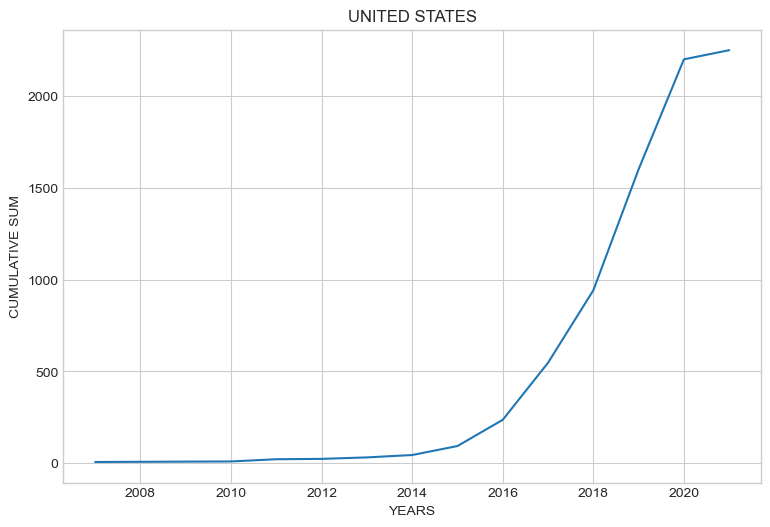

In [254]:
years =[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

us_cumsum = df_us.groupby('year', as_index=False).agg(['count'])[['cast']].cumsum()
us_cumsum.columns = [('COUNT')]
us_cumsum_values = us_cumsum['COUNT'].values

in_cumsum = df_ın.groupby('year', as_index=False).agg(['count'])[['cast']].cumsum()
in_cumsum.columns = [('COUNT')]
in_cumsum_values = in_cumsum['COUNT'].values

plt.figure(figsize=(9,6),dpi=100)
sns.lineplot(x=years,y=us_cumsum_values,markers="o")
plt.xlabel('YEARS')
plt.ylabel('CUMULATIVE SUM')
plt.title('UNITED STATES')



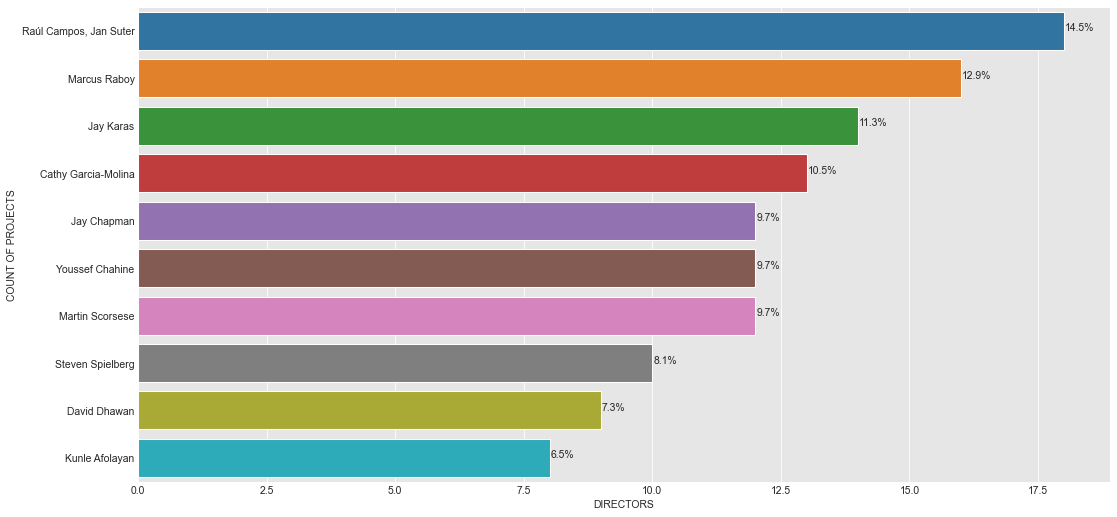

In [71]:
plt.figure(figsize=(15,7),dpi=75)
df_pop_directors = df[df['director'].isin(['Raúl Campos, Jan Suter','Marcus Raboy','Jay Karas','Cathy Garcia-Molina','Youssef Chahine',
                                        'Jay Chapman','Martin Scorsese','Steven Spielberg','David Dhawan','Kunle Afolayan'])]

a = sns.countplot(data=df_pop_directors,y='director',order=df_pop_directors['director'].value_counts().index)
plt.xlabel('DIRECTORS')
plt.ylabel('COUNT OF PROJECTS')

total = len(df_pop_directors['director'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))
        


plt.tight_layout()

<Figure size 1125x525 with 0 Axes>

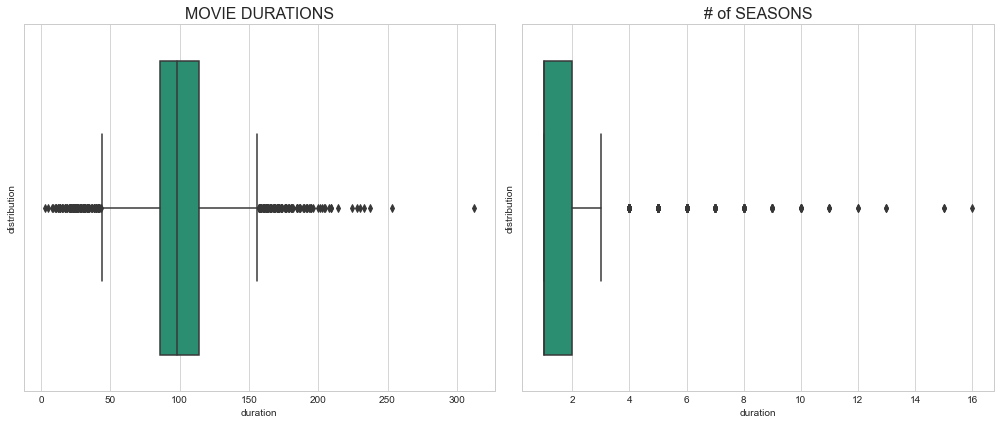

In [253]:
df_movies =df[df['type']=='Movie']
df_tv_show =df[df['type']=='TV Show']

movies_duration =df_movies["duration"].str.split(" ", n = 1,expand=True)
df['Movie Duration'] = movies_duration[0]

tv_show_duration =df_tv_show["duration"].str.split(" ", n = 1,expand=True)
df['# of TV Show Season'] = tv_show_duration[0]

df_movie = df[df['type']=='Movie']
df_show = df[df['type']=='TV Show']

sns.set_style("whitegrid")

plt.figure(figsize=(15,7),dpi=75)

df_movie = df_movie.copy()
df_movie['Movie Duration'] = df_movie['Movie Duration'].astype(int)


df_show = df_show.copy()
df_show['# of TV Show Season'] = df_show['# of TV Show Season'].astype(int)

f, axes = plt.subplots(figsize=(14, 6),ncols = 2)


sns.boxplot(x= df_movie["Movie Duration"],ax = axes[0],palette="Dark2")

axes[0].set_xlabel('duration')
axes[0].set_ylabel('distribution')
axes[0].set_title('MOVIE DURATIONS',fontsize=16)


sns.boxplot(x= df_show['# of TV Show Season'],ax = axes[1],palette="Dark2")

axes[1].set_xlabel('duration')
axes[1].set_ylabel('distribution')
axes[1].set_title('# of SEASONS',fontsize=16)

plt.tight_layout()

<AxesSubplot:xlabel='# of TV Show Season', ylabel='Density'>

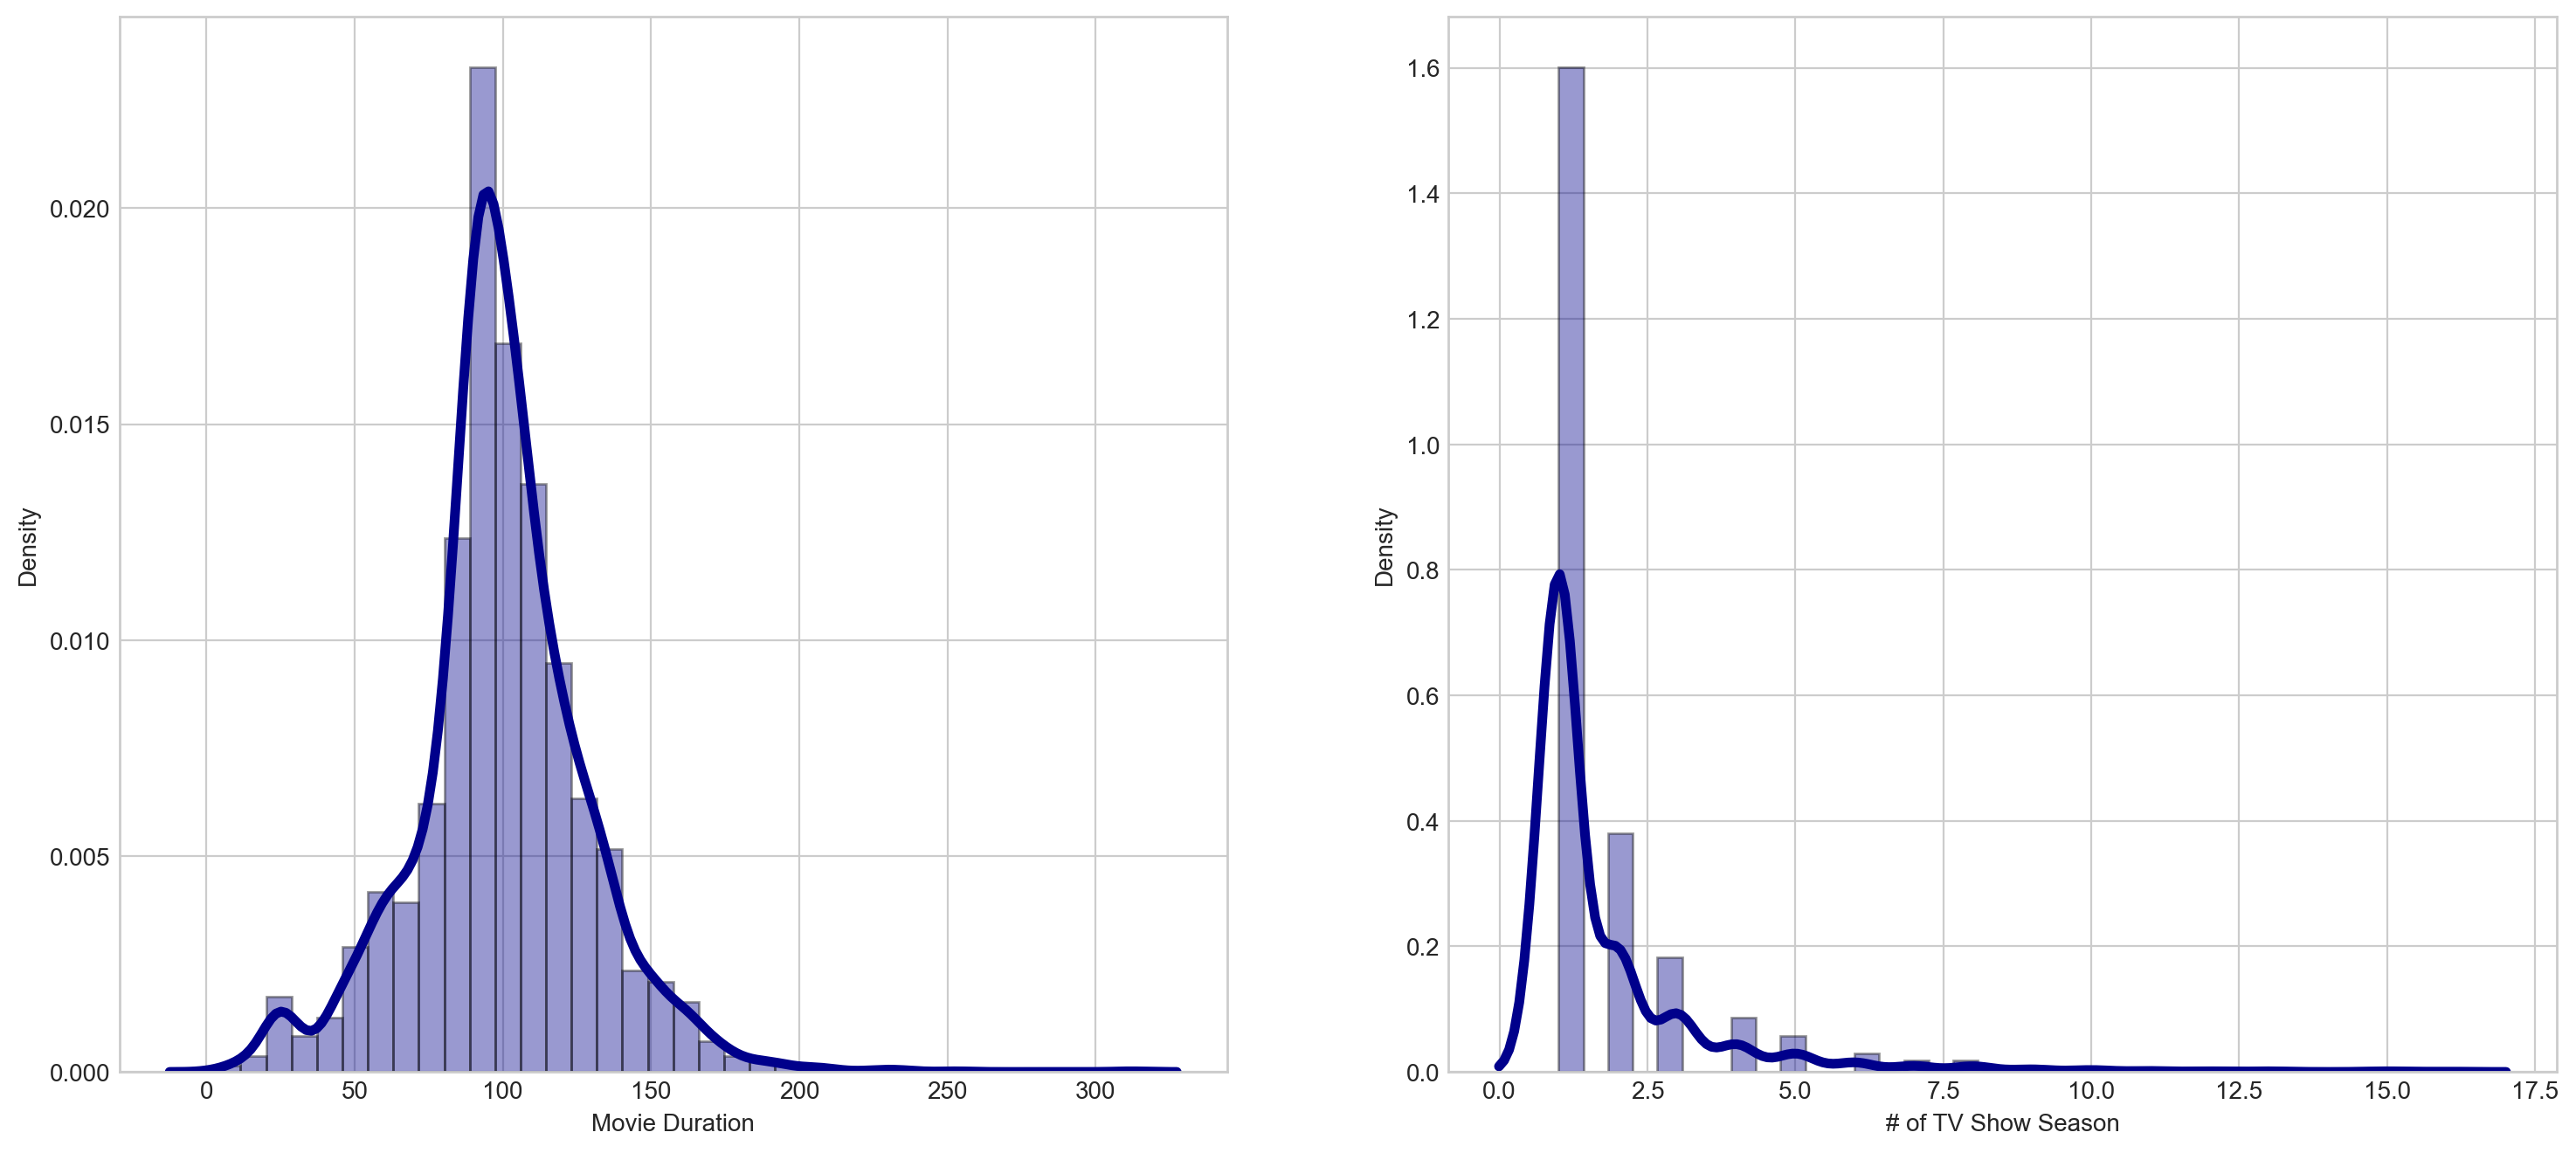

In [241]:
f, axes = plt.subplots(figsize=(18, 8),ncols = 2,dpi=200)

sns.distplot(df_movie['Movie Duration'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax=axes[0])


sns.distplot(df_tv_show['# of TV Show Season'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax=axes[1])

Movie tv show sayılarını karşılaştır.
Moviede hangi ülke , tv showda hangi ülke .

In [252]:
df_compare = df.groupby(['type']).count()[['description']]
df_compare.columns = ['Count']
df_compare

,Count
type,
Movie,5377
TV Show,2410


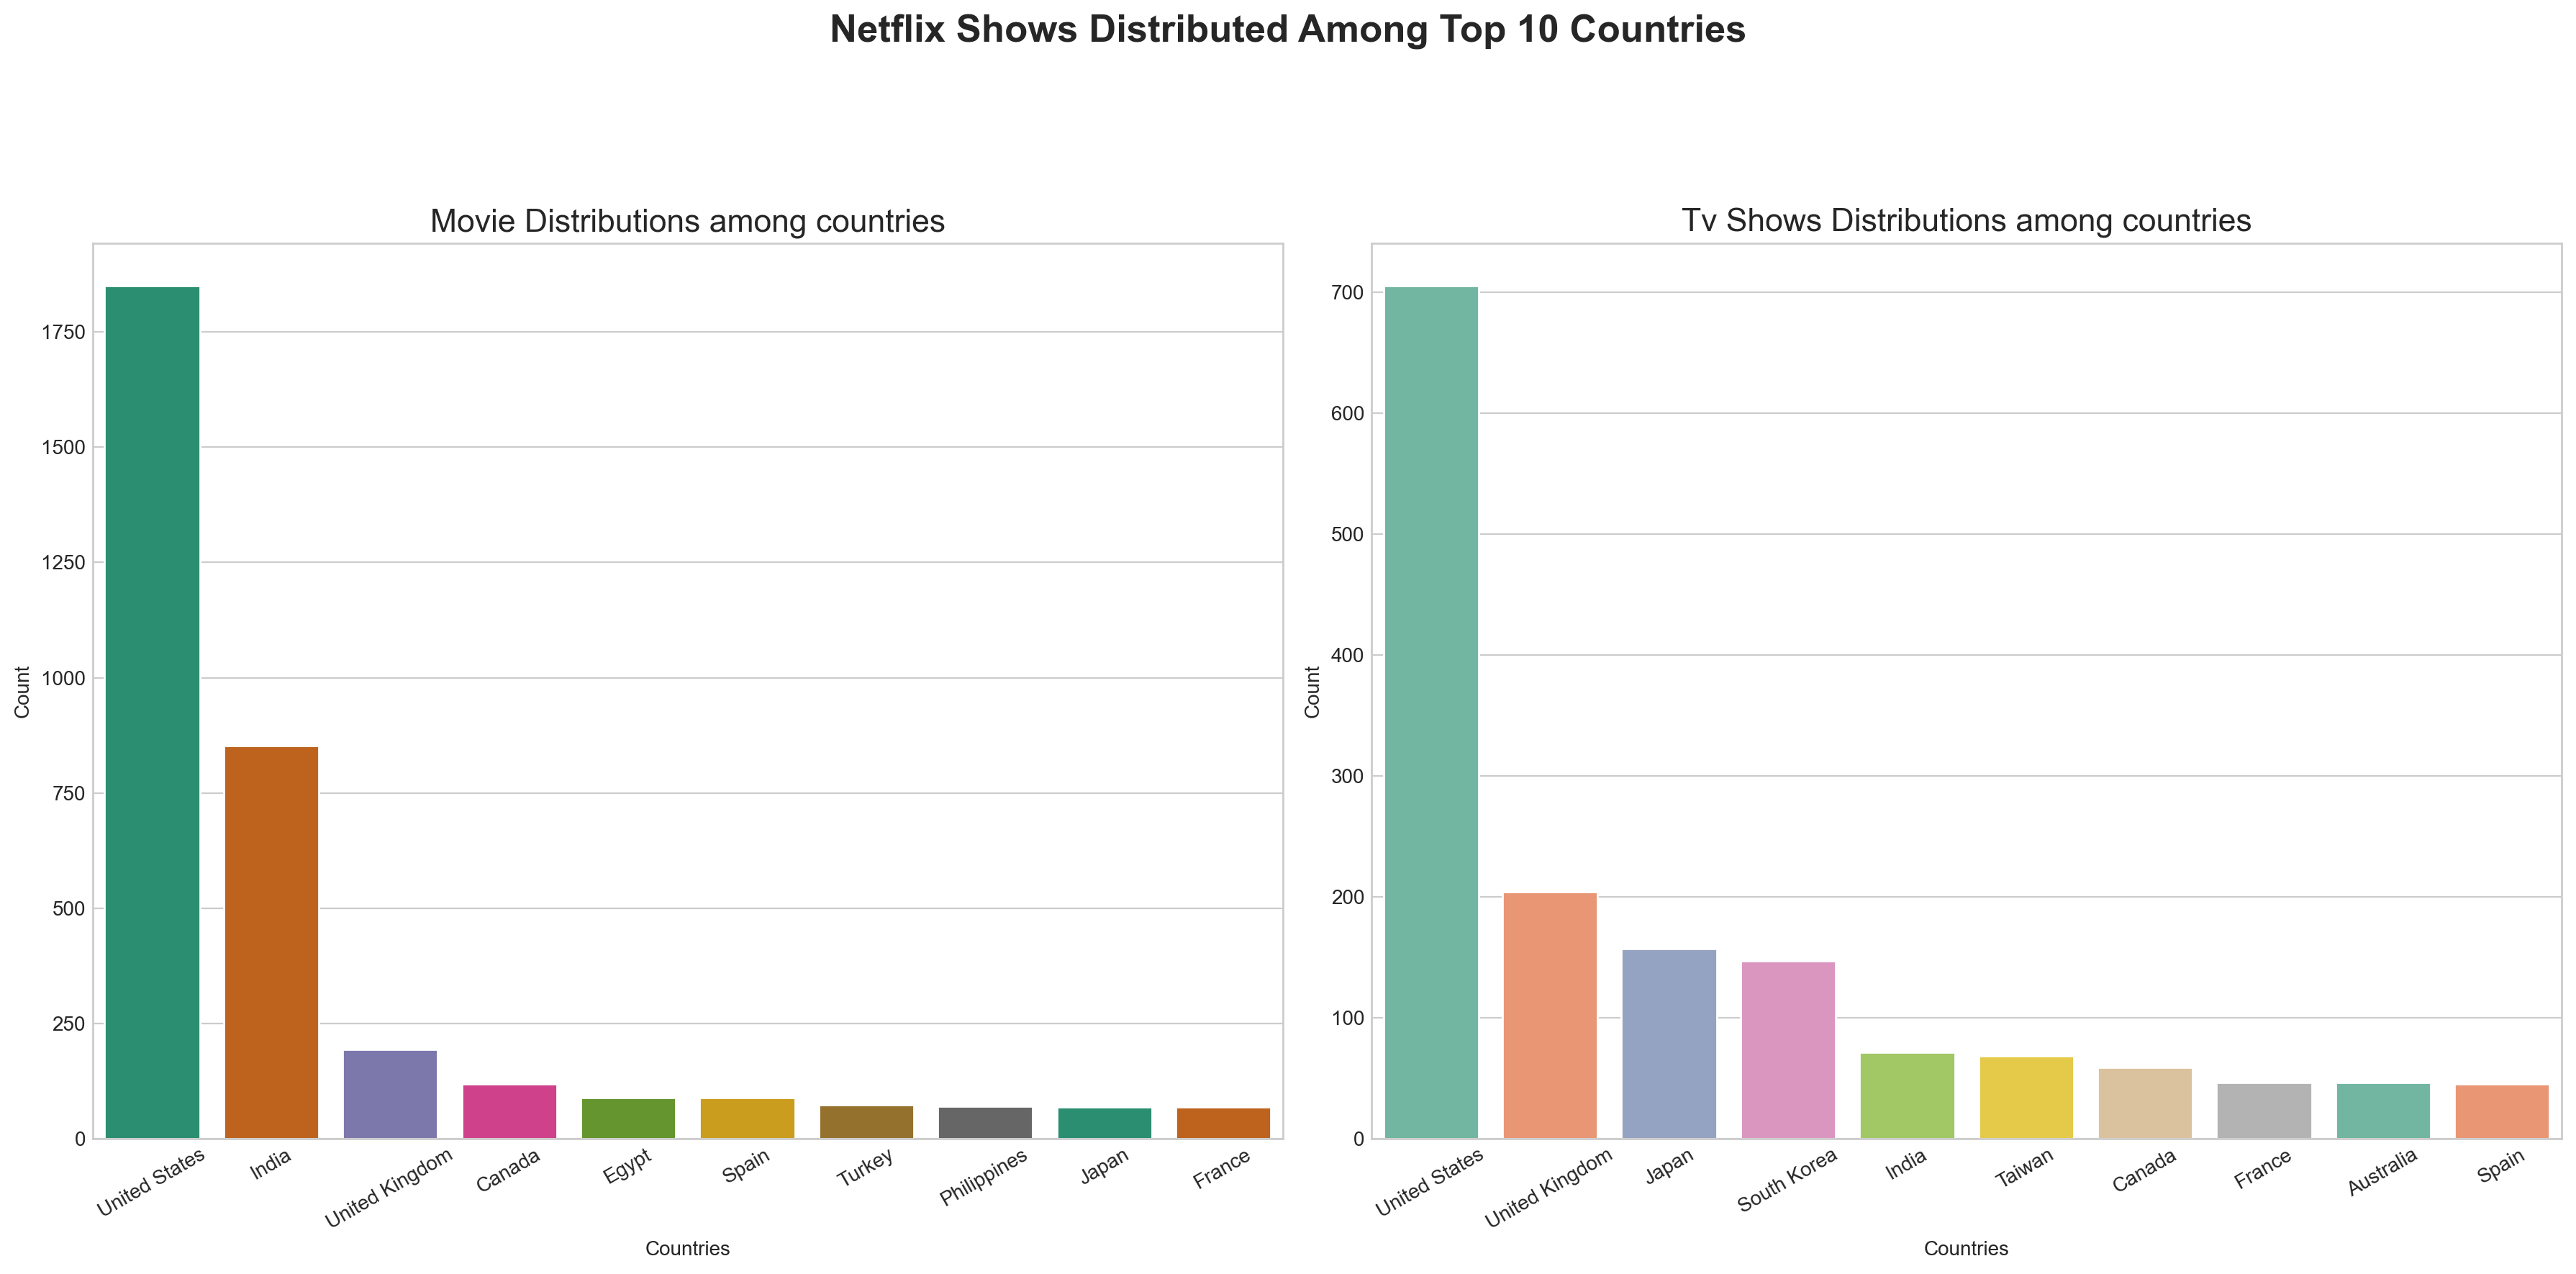

In [284]:
f, axes = plt.subplots(figsize=(18, 8),ncols = 2,dpi=200)
plt.suptitle('Netflix Shows Distributed Among Top 10 Countries',fontsize=19,weight = 'bold', y=1.1)

a = sns.countplot(x='country',data=df_movies,order=pd.value_counts(df_movies['country']).iloc[:10].index,ax=axes[0],palette='Dark2')
axes[0].set_xlabel('Countries')
axes[0].set_ylabel('Count')
axes[0].set_title('Movie Distributions among countries',fontsize=16)
a.set_xticklabels(a.get_xticklabels(),rotation=30)



b = sns.countplot(x='country',data=df_tv_show,order=pd.value_counts(df_tv_show['country']).iloc[:10].index,ax=axes[1],palette='Set2')
axes[1].set_xlabel('Countries')
axes[1].set_ylabel('Count')
axes[1].set_title('Tv Shows Distributions among countries',fontsize=16)
b.set_xticklabels(b.get_xticklabels(),rotation=30)


plt.tight_layout()
plt.savefig('Netflix Shows Popularity Among Countries.jpg')






# TURKEY

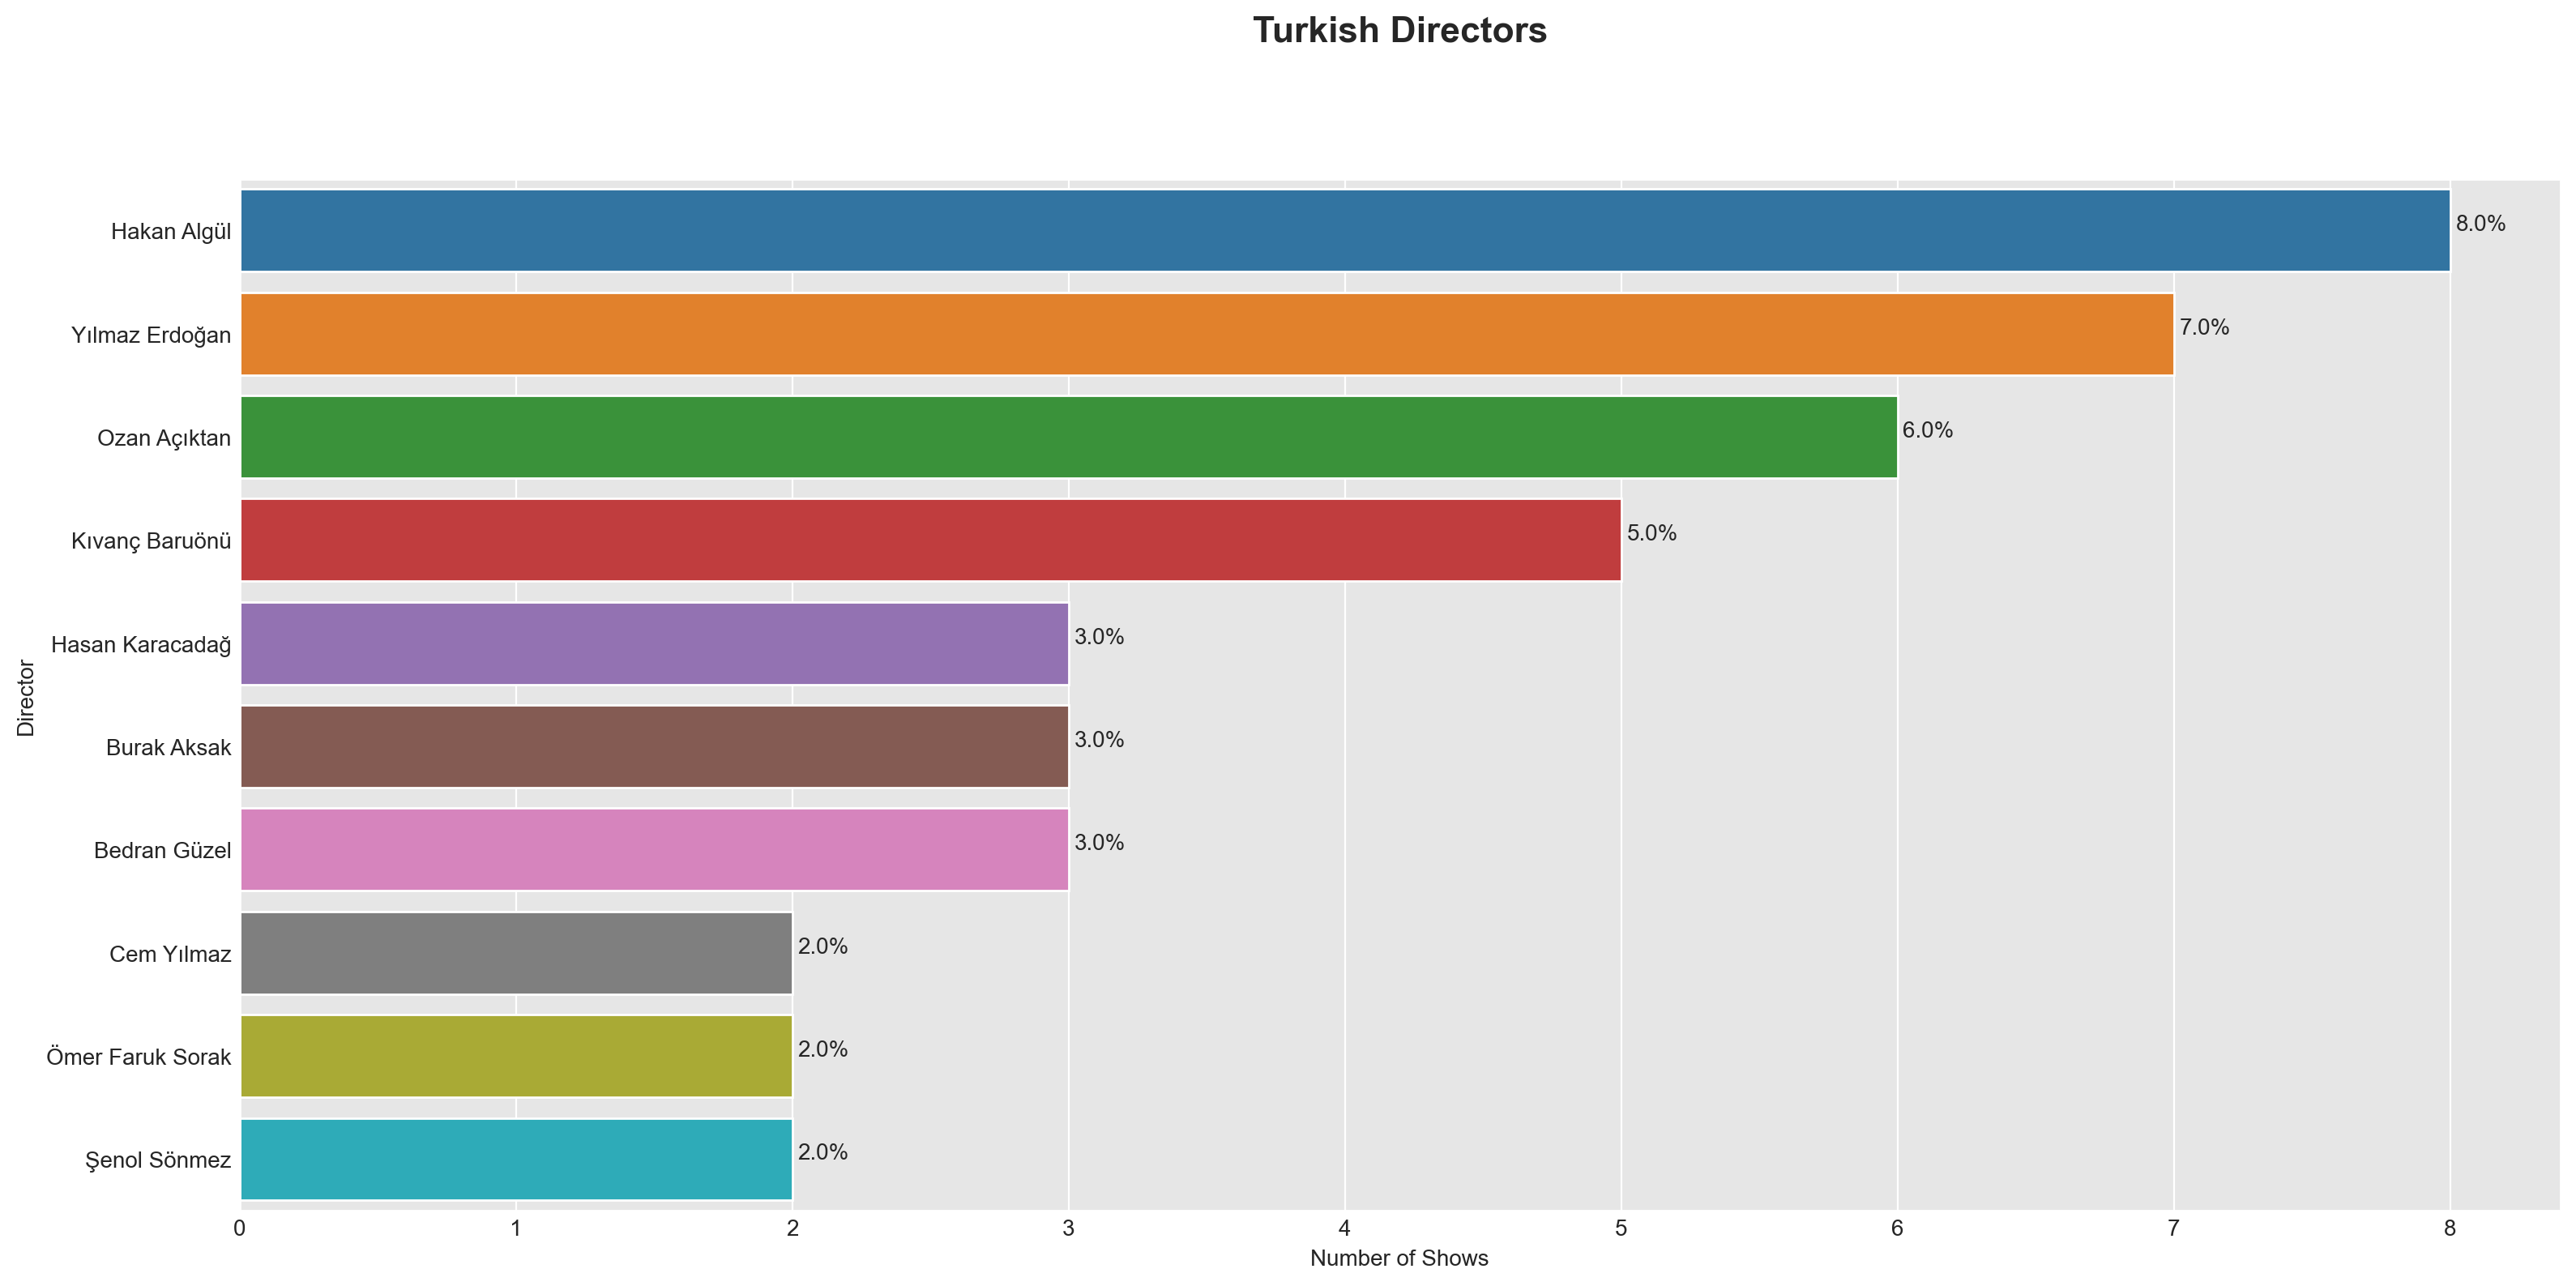

In [323]:
df_Turkey = df[df['country']=='Turkey'].reset_index()
df_Turkey.drop('index',axis=1,inplace=True)

plt.figure(figsize=(16,8),dpi=200)
a = sns.countplot(y='director',data=df_Turkey,order=pd.value_counts(df_Turkey['director']).iloc[:10].index)

plt.xlabel('Number of Shows',y=-1.12)
plt.ylabel('Director',x=-1)
plt.title('Turkish Directors',y=1.12,fontsize=16,weight='bold')
plt.tight_layout()

total = len(df_Turkey['director'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))
        


